# 1. Understanding the Iris Flower Data Set: A Historical Overview<a href="#1.-Understanding-the-Iris-Flower-Data-Set:-A-Historical-Overview" class="anchor-link">¶</a>

The Iris flower data set holds a significant place in the history of
statistics and data analysis. Introduced by the renowned British
statistician and biologist Ronald Fisher in his 1936 paper, "The use of
multiple measurements in taxonomic problems," this dataset is often
referred to as Anderson's Iris data set, acknowledging the contributions
of Edgar Anderson, who collected the data. The primary objective was to
quantify the morphologic variation among Iris flowers from three closely
related species. This dataset comprises 50 samples from each of the
three Iris species: Iris Setosa, Iris Virginica, and Iris Versicolor. It
includes measurements of four distinct features taken from each sample:
the length and width of both sepals and petals, all recorded in
centimeters.

# 2. Understanding Linear Regression:<a href="#2.-Understanding-Linear-Regression:" class="anchor-link">¶</a>

Linear regression is a fundamental supervised learning algorithm in
machine learning. It aims to establish a linear relationship between a
dependent variable (target) and one or more independent variables
(features). In the context of Iris Flower Data Set, the dependent
variable will be the Species, and the independent variables can be
factors like the size of the Petal length and width, The Sepal Length
and Width, etc.

# 3. Dataset - Features(Columns) Description<a href="#3.-Dataset---Features(Columns)-Description" class="anchor-link">¶</a>

    • ‘Petal Length’: The Length of the petal in the flower in centimeters.
    • ‘Petal Width’: The width of Petal in the flower in centimeters.
    • ‘Sepal Length’: The length of sepal in the flower in centimeters.
    • ‘Sepal width’: The width of sepal in the flower in centimeters.
    • ‘Class(Species)’: The class of the flower (target variable).

# 4. Importing the Libraries<a href="#4.-Importing-the-Libraries" class="anchor-link">¶</a>

In \[ \]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

# 5. Exploring the Dataset<a href="#5.-Exploring-the-Dataset" class="anchor-link">¶</a>

In \[ \]:

    df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In \[ \]:

    df.head()

Out\[ \]:

|     | sepal_length | sepal_width | petal_length | petal_width | species     |
|-----|--------------|-------------|--------------|-------------|-------------|
| 0   | 5.1          | 3.5         | 1.4          | 0.2         | Iris-setosa |
| 1   | 4.9          | 3.0         | 1.4          | 0.2         | Iris-setosa |
| 2   | 4.7          | 3.2         | 1.3          | 0.2         | Iris-setosa |
| 3   | 4.6          | 3.1         | 1.5          | 0.2         | Iris-setosa |
| 4   | 5.0          | 3.6         | 1.4          | 0.2         | Iris-setosa |

# 6. Understanding the Data<a href="#6.-Understanding-the-Data" class="anchor-link">¶</a>

In \[ \]:

    df.describe()

Out\[ \]:

|       | sepal_length | sepal_width | petal_length | petal_width |
|-------|--------------|-------------|--------------|-------------|
| count | 150.000000   | 150.000000  | 150.000000   | 150.000000  |
| mean  | 5.843333     | 3.054000    | 3.758667     | 1.198667    |
| std   | 0.828066     | 0.433594    | 1.764420     | 0.763161    |
| min   | 4.300000     | 2.000000    | 1.000000     | 0.100000    |
| 25%   | 5.100000     | 2.800000    | 1.600000     | 0.300000    |
| 50%   | 5.800000     | 3.000000    | 4.350000     | 1.300000    |
| 75%   | 6.400000     | 3.300000    | 5.100000     | 1.800000    |
| max   | 7.900000     | 4.400000    | 6.900000     | 2.500000    |

In \[ \]:

    df.shape

Out\[ \]:

    (150, 5)

In \[ \]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 150 entries, 0 to 149
    Data columns (total 5 columns):
     #   Column        Non-Null Count  Dtype  
    ---  ------        --------------  -----  
     0   sepal_length  150 non-null    float64
     1   sepal_width   150 non-null    float64
     2   petal_length  150 non-null    float64
     3   petal_width   150 non-null    float64
     4   species       150 non-null    object 
    dtypes: float64(4), object(1)
    memory usage: 6.0+ KB

In \[ \]:

    df.columns

Out\[ \]:

    Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
           'species'],
          dtype='object')

In \[ \]:

    df['species'].unique()

Out\[ \]:

    array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In \[ \]:

    df.isnull()

Out\[ \]:

|     | sepal_length | sepal_width | petal_length | petal_width | species |
|-----|--------------|-------------|--------------|-------------|---------|
| 0   | False        | False       | False        | False       | False   |
| 1   | False        | False       | False        | False       | False   |
| 2   | False        | False       | False        | False       | False   |
| 3   | False        | False       | False        | False       | False   |
| 4   | False        | False       | False        | False       | False   |
| ... | ...          | ...         | ...          | ...         | ...     |
| 145 | False        | False       | False        | False       | False   |
| 146 | False        | False       | False        | False       | False   |
| 147 | False        | False       | False        | False       | False   |
| 148 | False        | False       | False        | False       | False   |
| 149 | False        | False       | False        | False       | False   |

150 rows × 5 columns

In \[ \]:

    df.isnull().sum()

Out\[ \]:

    sepal_length    0
    sepal_width     0
    petal_length    0
    petal_width     0
    species         0
    dtype: int64

There is no null values in the dataset

In \[ \]:

    df.duplicated().sum()

Out\[ \]:

    3

In \[ \]:

    df=df.drop_duplicates()

    df.duplicated().sum()

Out\[ \]:

    0

# 7. Mapping the Species Column with the numeric values<a href="#7.-Mapping-the-Species-Column-with-the-numeric-values" class="anchor-link">¶</a>

In \[ \]:

    df['species'].unique()

Out\[ \]:

    array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In \[ \]:

    from sklearn.preprocessing import LabelEncoder

In \[ \]:

    data = {'species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']}
    my_data = pd.DataFrame(data)

In \[ \]:

    label_encoder = LabelEncoder()

In \[ \]:

    df['species_num'] = label_encoder.fit_transform(df['species'])

    df['species'] = label_encoder.inverse_transform(df['species_num'])

In \[ \]:

    print(my_data)

               species
    0      Iris-setosa
    1  Iris-versicolor
    2   Iris-virginica

In \[ \]:

    df

Out\[ \]:

|     | sepal_length | sepal_width | petal_length | petal_width | species        | species_num |
|-----|--------------|-------------|--------------|-------------|----------------|-------------|
| 0   | 5.1          | 3.5         | 1.4          | 0.2         | Iris-setosa    | 0           |
| 1   | 4.9          | 3.0         | 1.4          | 0.2         | Iris-setosa    | 0           |
| 2   | 4.7          | 3.2         | 1.3          | 0.2         | Iris-setosa    | 0           |
| 3   | 4.6          | 3.1         | 1.5          | 0.2         | Iris-setosa    | 0           |
| 4   | 5.0          | 3.6         | 1.4          | 0.2         | Iris-setosa    | 0           |
| ... | ...          | ...         | ...          | ...         | ...            | ...         |
| 145 | 6.7          | 3.0         | 5.2          | 2.3         | Iris-virginica | 2           |
| 146 | 6.3          | 2.5         | 5.0          | 1.9         | Iris-virginica | 2           |
| 147 | 6.5          | 3.0         | 5.2          | 2.0         | Iris-virginica | 2           |
| 148 | 6.2          | 3.4         | 5.4          | 2.3         | Iris-virginica | 2           |
| 149 | 5.9          | 3.0         | 5.1          | 1.8         | Iris-virginica | 2           |

147 rows × 6 columns

In \[ \]:

    df= df.drop(columns=['species'])

In \[ \]:

    df

Out\[ \]:

|     | sepal_length | sepal_width | petal_length | petal_width | species_num |
|-----|--------------|-------------|--------------|-------------|-------------|
| 0   | 5.1          | 3.5         | 1.4          | 0.2         | 0           |
| 1   | 4.9          | 3.0         | 1.4          | 0.2         | 0           |
| 2   | 4.7          | 3.2         | 1.3          | 0.2         | 0           |
| 3   | 4.6          | 3.1         | 1.5          | 0.2         | 0           |
| 4   | 5.0          | 3.6         | 1.4          | 0.2         | 0           |
| ... | ...          | ...         | ...          | ...         | ...         |
| 145 | 6.7          | 3.0         | 5.2          | 2.3         | 2           |
| 146 | 6.3          | 2.5         | 5.0          | 1.9         | 2           |
| 147 | 6.5          | 3.0         | 5.2          | 2.0         | 2           |
| 148 | 6.2          | 3.4         | 5.4          | 2.3         | 2           |
| 149 | 5.9          | 3.0         | 5.1          | 1.8         | 2           |

147 rows × 5 columns

# 7. Exploring the Data Analysis<a href="#7.-Exploring-the-Data-Analysis" class="anchor-link">¶</a>

In \[ \]:

    plt.hist(df['species_num'])
    plt.xlabel('species')
    plt.ylabel('Frequency')
    plt.show()

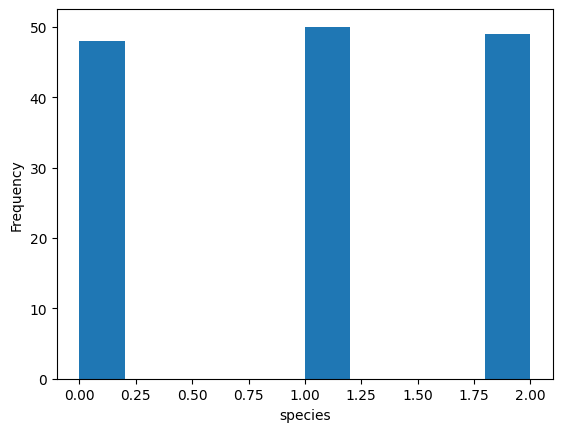

In \[ \]:

    import seaborn as sns

In \[ \]:

    correlation_matrix=df.corr(numeric_only=True)
    print(correlation_matrix)

                  sepal_length  sepal_width  petal_length  petal_width  \
    sepal_length      1.000000    -0.109321      0.871305     0.817058   
    sepal_width      -0.109321     1.000000     -0.421057    -0.356376   
    petal_length      0.871305    -0.421057      1.000000     0.961883   
    petal_width       0.817058    -0.356376      0.961883     1.000000   
    species_num       0.782904    -0.418348      0.948339     0.955693   

                  species_num  
    sepal_length     0.782904  
    sepal_width     -0.418348  
    petal_length     0.948339  
    petal_width      0.955693  
    species_num      1.000000  

In \[ \]:

    sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
    plt.show()

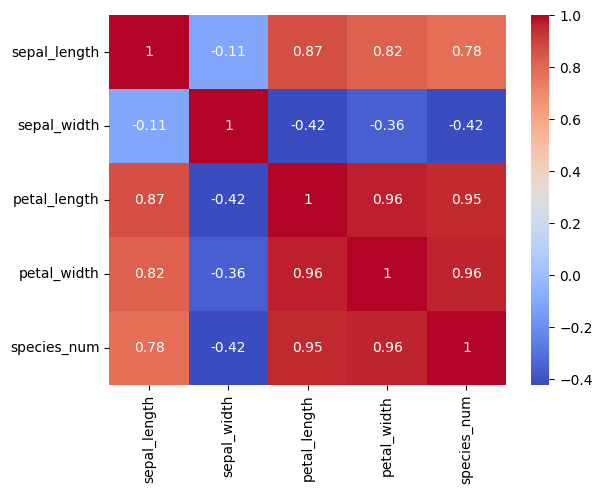

In \[ \]:

    sns.pairplot(df)
    plt.show()

    /opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
      self._figure.tight_layout(*args, **kwargs)

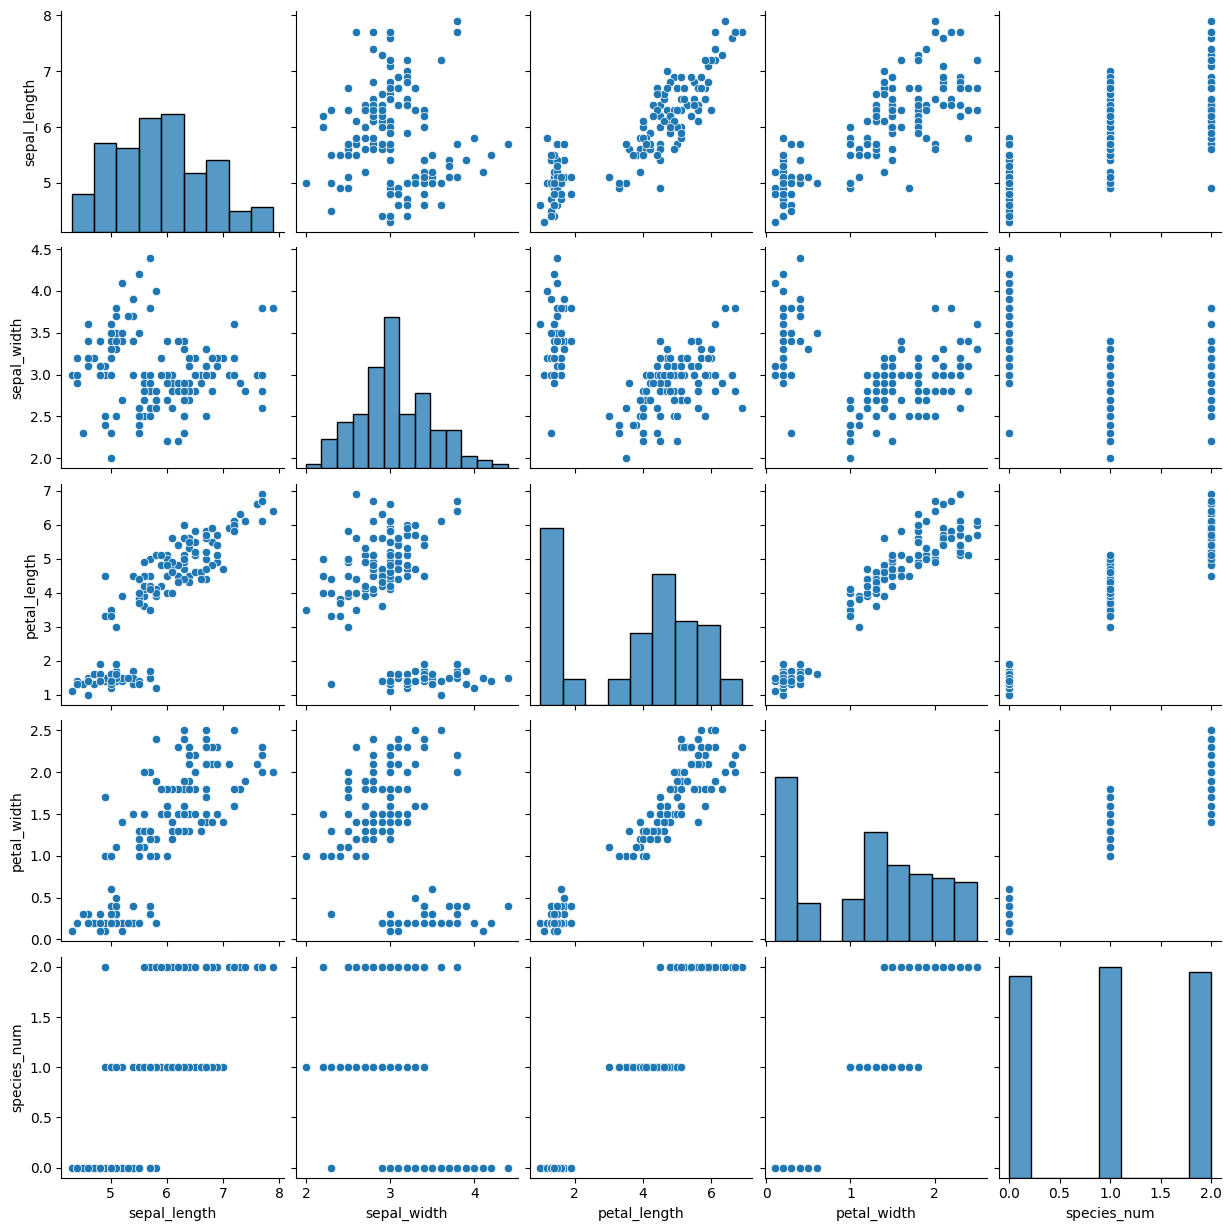

# 8. Spliting the data<a href="#8.-Spliting-the-data" class="anchor-link">¶</a>

We could already feed our X and y data directly to our linear regression
model, but if we use all of our data at once, how can we know if our
results are any good? Just like in learning, what we will do, is use a
part of the data to train our model and another part of it, to test it

This is easily achieved through the helper **train_test_split()**
method, which accepts our X and y arrays (also works on DataFrames and
splits a single DataFrame into training and testing sets), and a
test_size.

train_test_split() helper method from from ***sklearn.model_selection
import train_test_split***

test_size is the percentage of the overall data we'll be using for
testing

Some common train-test splits are 80/20 and 70/30. Here I use 80/20

random_state = SEED = Some Number(42) = Splitting data into
training/validation/test sets: random seeds ensure that the data is
divided the same way every time the code is run

In \[ \]:

    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]

In \[ \]:

    X

Out\[ \]:

|     | sepal_length | sepal_width | petal_length | petal_width |
|-----|--------------|-------------|--------------|-------------|
| 0   | 5.1          | 3.5         | 1.4          | 0.2         |
| 1   | 4.9          | 3.0         | 1.4          | 0.2         |
| 2   | 4.7          | 3.2         | 1.3          | 0.2         |
| 3   | 4.6          | 3.1         | 1.5          | 0.2         |
| 4   | 5.0          | 3.6         | 1.4          | 0.2         |
| ... | ...          | ...         | ...          | ...         |
| 145 | 6.7          | 3.0         | 5.2          | 2.3         |
| 146 | 6.3          | 2.5         | 5.0          | 1.9         |
| 147 | 6.5          | 3.0         | 5.2          | 2.0         |
| 148 | 6.2          | 3.4         | 5.4          | 2.3         |
| 149 | 5.9          | 3.0         | 5.1          | 1.8         |

147 rows × 4 columns

In \[ \]:

    y

Out\[ \]:

    0      0
    1      0
    2      0
    3      0
    4      0
          ..
    145    2
    146    2
    147    2
    148    2
    149    2
    Name: species_num, Length: 147, dtype: int64

In \[ \]:

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In \[ \]:

    print(X_test.shape)
    print(X_train.shape)
    print(y_test.shape)
    print(y_train.shape)

    (30, 4)
    (117, 4)
    (30,)
    (117,)

In \[ \]:

    X_train.head()

Out\[ \]:

|     | sepal_length | sepal_width | petal_length | petal_width |
|-----|--------------|-------------|--------------|-------------|
| 69  | 5.6          | 2.5         | 3.9          | 1.1         |
| 16  | 5.4          | 3.9         | 1.3          | 0.4         |
| 146 | 6.3          | 2.5         | 5.0          | 1.9         |
| 7   | 5.0          | 3.4         | 1.5          | 0.2         |
| 5   | 5.4          | 3.9         | 1.7          | 0.4         |

In \[ \]:

    y_train.head()

Out\[ \]:

    69     1
    16     0
    146    2
    7      0
    5      0
    Name: species_num, dtype: int64

# 9. Training the Model<a href="#9.-Training-the-Model" class="anchor-link">¶</a>

In \[ \]:

    reg = LinearRegression()
    reg.fit(X_train,y_train)

Out\[ \]:

    LinearRegression()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

LinearRegression

    LinearRegression()

In \[ \]:

    reg.coef_

Out\[ \]:

    array([-0.08827642, -0.06820524,  0.19171326,  0.66364361])

In \[ \]:

    reg.intercept_

Out\[ \]:

    0.19388586489641957

# 10. Testing the model<a href="#10.-Testing-the-model" class="anchor-link">¶</a>

In \[ \]:

    y_pred = reg.predict(X_test)
    y_pred=y_pred.round().astype(int)

In \[ \]:

    df_pred=pd.DataFrame({'Actual':y_test,'Predicted Value': y_pred})
    print(df_pred)

         Actual  Predicted Value
    65        1                1
    132       2                2
    112       2                2
    3         0                0
    138       2                2
    139       2                2
    134       2                1
    19        0                0
    48        0                0
    107       2                2
    90        1                1
    78        1                1
    28        0                0
    10        0                0
    63        1                1
    18        0                0
    97        1                1
    20        0                0
    79        1                1
    77        1                1
    71        1                1
    46        0                0
    2         0                0
    30        0                0
    17        0                0
    121       2                2
    141       2                2
    49        0                0
    129       2                2
    9         0                0

# 11. Evaluation of the model<a href="#11.-Evaluation-of-the-model" class="anchor-link">¶</a>

In \[ \]:

    from sklearn.metrics import mean_absolute_error,mean_squared_error
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)

In \[ \]:

    print(mae)
    print(mse)
    print(rmse)

    0.03333333333333333
    0.03333333333333333
    0.18257418583505536

In \[ \]:

    from sklearn.metrics import r2_score

In \[ \]:

    print(r2_score(y_test,y_pred))

    0.953416149068323

In \[ \]:

    # Create a new figure with subplots
    fig, (ax1) = plt.subplots(1, figsize=(12, 6))

    # Scatter plot of actual versus predicted values on the first subplot
    ax1.scatter(y_test, y_pred)
    ax1.set_title('Actual vs Prediction')
    ax1.set_xlabel('Actual', fontsize=15)
    ax1.set_ylabel('Predicted', fontsize=15)

    # Show the plot
    plt.show() 

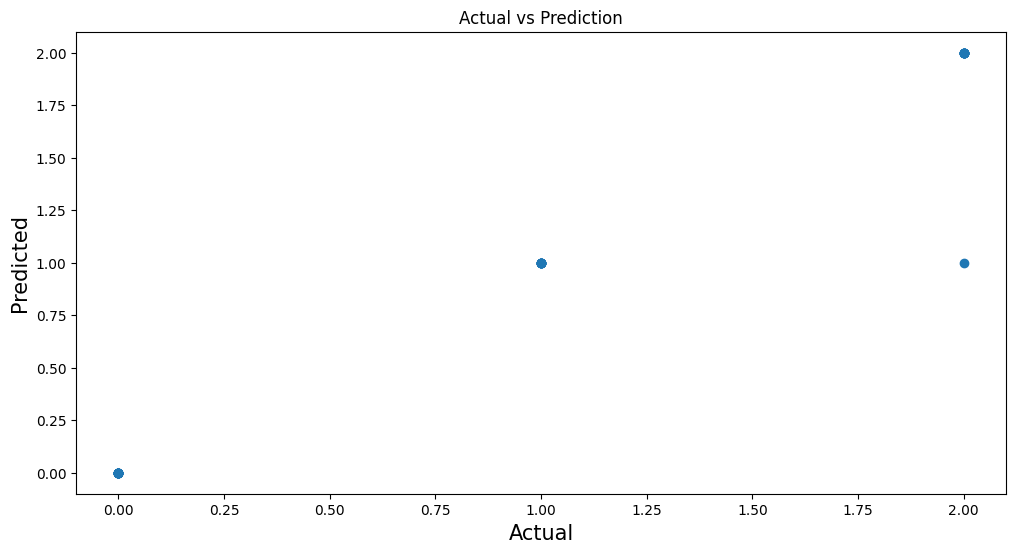